In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flipkart-products/flipkart_com-ecommerce_sample.csv


In [2]:
data = pd.read_csv("/kaggle/input/flipkart-products/flipkart_com-ecommerce_sample.csv")

The pandas function read_csv() reads in values, where the delimiter is a comma character. You can export a file into a csv file in any modern office suite including Google Sheets. Use the following csv data as an example. If you want to export data from a DataFrame or pandas.

In [3]:
data.head(20)


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name..."
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
7,8542703ca9e6ebdf6d742638dfb1f2ca,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGYGHFUEXN,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/e/x...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
8,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,699.0,

The head() function is used to get the first n rows. This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it



In [4]:
data.tail(20)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
19980,cae6dc2dedf125cc21d6e26e67b85dfb,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFHF7KGHTT3,1220.0,600.0,"[""http://img5a.flixcart.com/image/wall-decorat...",False,WallDesign Small Vinyl Sticker (Pack of 75)\n ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19981,66652af6b8cdd820f00788c8c974fc7e,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFGUMVJN3U5,1080.0,530.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.530 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19982,40a11fee08863edbbc3c2a03d0528bf4,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ACQUHXFB,4930.0,1896.0,"[""http://img5a.flixcart.com/image/sticker/7/j/...",False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19983,c5692a03af64973a9e17fc95ac22e2c2,2015-12-01 10:15:43 +0000,http://www.flipkart.com/999store-medium-paper-...,999store Medium Paper Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE2FRBJNWDKUFF,999.0,599.0,"[""http://img6a.flixcart.com/image/sticker/u/f/...",False,Buy 999store Medium Paper Sticker for Rs.599 o...,No rating available,No rating available,999store,"{""product_specification""=>[{""key""=>""Sales Pack..."
19984,6080650fa0dcef9b25971ee8df153ad4,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVBHMJAYT6,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/y/t/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19985,4d8a99a3d4224607629e428f447d4acc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/999store-medium-paper-...,999store Medium Paper Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE2FRBMHDZHFJR,999.0,599.0,"[""http://img6a.flixcart.com/image/sticker/f/j/...",False,Buy 999store Medium Paper Sticker for Rs.599 o...,No rating available,No rating available,999store,"{""product_specification""=>[{""key""=>""Sales Pack..."
19986,685191121dc0b76fd58cbea81d0019ef,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFHGZ5FPWFB,1220.0,600.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.600 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19987,d359f1bb61997f20ce873f7092998edd,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-extra-large...,Wallmantra Extra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5UVA3QQRMZ,1839.0,1216.0,"[""http://img6a.flixcart.com/image/sticker/r/m/...",False,Buy Wallmantra Extra Large Vinyl Stickers Stic...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19988,9d015eb2ac7ca051e16c733c9f0a0b96,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers 

Return the last n rows. This function returns last n rows from the object based on position. It is useful for quickly verifying data, for example, after sorting or appending rows.



In [5]:
data.shape


(20000, 15)

The shape attribute of pandas. DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns)



In [6]:
data.columns


Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage



In [8]:
data.drop_duplicates(inplace = True)
data.shape


(20000, 15)

The shape is a tuple of integers. ... In other words: The "shape" of an array is a tuple with the number of elements per axis (dimension). In our example, the shape is equal to (6, 3), i.e. we have 6 lines and 3 columns shape attribute returns a tuple of the shape of the underlying data for the given series objects. Example  #1 Use Series. shape attribute to find the shape of the underlying data of the given series object



<AxesSubplot:>

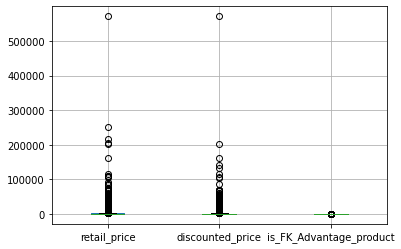

In [9]:
data.boxplot()


Make a box-and-whisker plot from DataFrame columns, optionally grouped by some other columns. A box plot is a method for graphically depicting groups of numerical data through their quartiles.

boxplot() method can be a Numpy array or Python list or Tuple of arrays. Let us create the box plot by using numpy. random. normal() to create some random data, it takes mean, standard deviation, and the desired number of values as arguments



In [10]:
data.describe()


,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


Pandas describe() is used to view some basic statistical details like percentile, mean, std,min,max,count....etc. of a data frame or a series of numeric values.



In [11]:
data.hist


<bound method hist_frame of                                 uniq_id            crawl_timestamp  \
0      c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1      7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
2      f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
3      0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
4      bc940ea42ee6bef5ac7cea3fb5cfbee7  2016-03-25 22:59:23 +0000   
...                                 ...                        ...   
19995  7179d2f6c4ad50a17d014ca1d2815156  2015-12-01 10:15:43 +0000   
19996  71ac419198359d37b8fe5e3fffdfee09  2015-12-01 10:15:43 +0000   
19997  93e9d343837400ce0d7980874ece471c  2015-12-01 10:15:43 +0000   
19998  669e79b8fa5d9ae020841c0c97d5e935  2015-12-01 10:15:43 +0000   
19999  cb4fa87a874f715fff567f7b7b3be79c  2015-12-01 10:15:43 +0000   

                                             product_url  \
0      http://www.flipkart.com/alisha-solid-women-s-c...   
1      http

In [12]:
data_new=data [data ['retail_price'] == 0]


In [13]:
amazon_data_new


NameError: name 'amazon_data_new' is not defined

In [ ]:
data_new.count()


In [ ]:
data_dict = {42:5, 71:16.09, 116:9.78, 193:6.08, 219:6.12, 358:3.55, 381:10.28, 461:8.83, 505:6.57, 506:6.57, 507:6.57, 508:6.57}


In [ ]:
data_dict


In [ ]:
data.info()


In [ ]:
data.isnull()


In [ ]:
plt.plot("Reviews","ro")
plt.xticks(rotation =90)
plt.show()


Import pyplot from Matplotlib and visualize our DataFrame: import pandas as pd. import matplotlib.pyplot as plt. ... import pandas as pd. import matplotlib.pyplot as plt. df = pd.read_csv('data.csv') ... A scatterplot where there are no relationship between the columns: import pandas as pd. Whether you’re just getting to know a dataset or preparing to publish your findings, visualization is an essential tool. Python’s popular data analysis library, pandas, provides several different options for visualizing your data with .plot(). Even if you’re at the beginning of your pandas journey, you’ll soon be creating basic plots that will yield valuable insights into your data.



In [ ]:
data.isnull().sum()


Syntax: Pandas.isnull(“DataFrame Name”) or DataFrame.isnull() Parameters: Object to check null values for. Return Type: Dataframe of Boolean values which are True for NaN values. sum() function return the sum of the values for the requested axis. If the input is index axis then it adds all the values in a column and repeats the same for all the columns and returns a series containing the sum of all the values in each column.



In [ ]:
data.hist()


# References 
The dataset used in this project was downloaded from : https://www.kaggle.com/datasets?fileType=csv